In [1]:
from IPython.display import Image

# 12. 다층 인공 신경망 구현
* 다층 신경망 개념
* 신경망을 훈련시키기 위해 필요한 기본적인 역전파 알고리즘 구현
* 이미지 분류 문제를 위해 간단한 다층 신경망 훈련

# 12.1 인공 신경망으로 복잡한 함수 모델링
* 사진 이미지 태깅(tagging)을 위한 페이스북의 DeepFace
* 중국어 음성 검색을 지원하는 바이두의 DeepSpeech
* 구글의 새로운 언어 번역 서비스
* 신약 개발과 독성 예측에 사용되는 새로운 기법
* 훈련된 피부과 전문의와 비슷한 정확도로 피부암을 진단할 수 있는 모바일 애플리케이션
* 유전자 서열에서 단백질 3D 구조 예측
* 카메라 비디오 스트림 같은 관측 데이터만 사용하여 교통 체증 속에서 운전하는 방법 학습

### 12.1.1 단일층 신경망 요약


In [2]:
# 아달린(ADAptive LInear NEuron, Adaline) 알고리즘
Image(url='https://git.io/JLdrS', width=600)

* 이진 분류를 수행하는 아달린 알고리즘. 
    * 경사 하강법 최적화 알고리즘을 사용하여 모델 가중치를 학습.
    * (훈련 데이터셋을 한 번 순회하는) 에포크마다 가중치 벡터 $w$ 업데이트

$$\boldsymbol{w} := \boldsymbol{w} + \mathit\Delta \boldsymbol{w}$$

전체 훈련 데이터셋에 대한 그레이디언트를 계산하고 그레이디언트의 반대 방향으로 진행하도록 모델 가중치를 업데이트.

최적의 모델 가중치를 찾기 위해 제곱 오차합(SSE) 비용 함수로 정의된 목적 함수를 최적화한다. 또 학습률을 그레이디언트에 곱한다. 학습률은 비용 함수의 전역 최솟값을 지나치지 않도록 학습 속도를 조절하기 위해 신중하게 선택해야 한다.

경사 하강법 최적화에서는 에포크마다 모든 가중치를 동시에 업데이트한다.

업데이트할 그레이디언트를 계산하기 위해 활성화 함수를 사용했지만, 예측을 위해서는 임계 함수를 구현하여 연속적인 출력 값을 이진 클래스 레이블로 압축했다.

$g(z) >= 0$일 때 1, 그 외 -1이다.

* 단일층 네트워크
    * 아달린이 입력층과 출력층 두 개의 층으로 구성되어 있지만 입력층과 출력층 사이에 연결이 하나이기 때문에 단일층(single-layer) 네트워크라고 한다.

* 확률적 경사 하강법(stochastic gradient descent)
    * 모델 학습 가속
    * 하나의 훈련 샘플(온라인 학습) 또는 적은 수의 훈련 샘플(미니 매치 학습)을 사용해서 비용을 근사한다.
    * 경사 하강법에 비해 더 자주 가중치를 업데이트하기 때문에 학습이 빠르다.

### 12.1.2 다층 신경망 구조
* 완전 연결 네트워크 - 다층 퍼셉트론(Multilayer Perceptron, MLP)


In [3]:
# 다층 퍼셉트론 - 3개의 층
Image(url='https://git.io/JLdrx', width=600)

입력층, 은닉층, 출력층 하나씩 가진 MLP이다. 은닉층의 유닛은 입력층과 완전 연결되어 있고, 출력층은 은닉층과 완전 연결되어 있다. 하나 이상의 은닉층을 가진 네트워크를 심층 인공 신경망(deep artificial neural network)이라고 한다.

* 은닉층 추가
    * 깊은 네트워크 구조를 만들기 위해 MLP에 몇 개의 은닉층이든 추가할 수 있다.
    * 신경망의 층과 유닛 개수는 추가적인 하이퍼파라미터이다.
    * 역전차로 계산하는 오차 그래이디언트는 네트워크에 층이 추가될수록 점점 더 작아진다.
        * 이런 그레이디언트 소실 문제는 모델을 학습하기 어렵게 만든다.
        

In [4]:
# 다층 퍼셉트론의 표기법
Image(url='https://git.io/JLdrp', width=500)

### 12.1.3 정방향 계산으로 신경망 활성화 출력 계산
* 정방향 계산(forward propagation) 과정
    1. 입력층에서 시작해서 정방향으로 훈련 데이터의 패턴을 네트워크에 전파하여 출력을 만든다.
    2. 네트워크의 출력을 기반으로 비용 함수를 이용하여 최소화해야 할 오차 계산
    3. 네트워크에 있는 모든 가중치에 대한 도함수를 찾아 오차를 역전파하고 모델 업데이트

위 세 단계를 여러 에포크동안 반복하고 MLP 가중치를 학습한다. 그 후 클래스 레이블을 예측하기 위해 정방향 계산으로 네트워크의 출력을 만들고 임계 함수를 적용한다. 이 클래스 레이블은 원-핫 인코딩으로 표현된다.

활성화 함수는 그레이디언트 기반 방식을 사용하여 뉴런과 연결된 가중치를 학습하기 위해 미분 가능해야 한다. 이미지 분류 같은 복잡한 문제를 해결하기 위해서는 MLP 모델에 비선형 활성화 함수를 사용해야 한다.

* 피드포워드(feed forward): 각 층에서 입력을 순환시키지 않고 다음 층으로 전달


# 12.2 손글씨 숫자 분류

### 12.2.1 MNIST 데이터셋

MNIST 데이터셋은 http://yann.lecun.com/exdb/mnist/ 에 공개되어 있으며 다음 네 부분으로 구성되어 있습니다.

- 훈련 세트 이미지: train-images-idx3-ubyte.gz(9.9MB, 압축 해제 후 47MB, 60,000개 샘플)
- 훈련 세트 레이블: train-labels-idx1-ubyte.gz(29KB, 압축 해제 후 60KB, 60,000개 레이블)
- 테스트 세트 이미지: t10k-images-idx3-ubyte.gz(1.6MB, 압축 해제 후 7.8MB, 10,000개 샘플)
- 테스트 세트 레이블: t10k-labels-idx1-ubyte.gz(5KB, 압축 해제 후 10KB, 10,000개 레이블)

In [5]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2022-01-28 19:08:13--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz.1’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2022-01-28 19:08:14 (76.5 MB/s) - ‘train-images-idx3-ubyte.gz.1’ saved [9912422/9912422]

--2022-01-28 19:08:14--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz.1’

train-labels-idx1-u 100%[=====

In [6]:
# MNIST 데이터 압축 풀기
import sys
import gzip
import shutil
import os

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir() if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

In [7]:
# 압축 해제된 MNIST 데이터 불러오기
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2 # MNIST 픽셀 값은 -1에서 1 사이로 정규화 - 원래는 0에서 255 사이 값.
 
    return images, labels

* load_mnist 함수는 두 개의 배열을 반환
    * images: n * m 차원의 넘파이 배열
        * n: 샘플 개수
        * m: 특성(픽셀) 개수
    * labels: 이미지에 해당하는 타깃 배열
    * 훈련 데이터셋은 6만 개의 숫자 샘플을 가지고 있고 테스트 데이터셋은 1만 개의 샘플으 가지고 있다.
    * 28 * 28 픽셀 이미지로, 각 픽셀은 회색 톤의 강도를 나타낸다.
    * 28 * 28 픽셀을 1차원 행 벡터로 펼져이고, 이 벡터는 이미지 배열에서 한 행이 된다(즉, 28 * 28 = 784개의 행 또는 이미지가 된다).
    * 이미지 픽셀을 다룰 때는 평균을 0에 맞추고 [-1, 1] 범위로 조정하는 것이 일반적이다. 

In [8]:
!ls

mnist_scaled.npz	     t10k-labels-idx1-ubyte.gz.1
sample_data		     train-images-idx3-ubyte
t10k-images-idx3-ubyte	     train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz    train-images-idx3-ubyte.gz.1
t10k-images-idx3-ubyte.gz.1  train-labels-idx1-ubyte
t10k-labels-idx1-ubyte	     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz    train-labels-idx1-ubyte.gz.1


In [9]:
X_train, y_train = load_mnist('', kind='train')
print('행: %d, 열: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('행: %d, 열: %d' % (X_test.shape[0], X_test.shape[1]))

행: 60000, 열: 784
행: 10000, 열: 784


In [10]:
import matplotlib.pyplot as plt

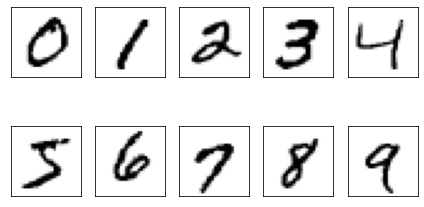

In [11]:
# 숫자 0에서 9까지의 각 클래스 첫 번째 이미지 시각화
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28) # 특성 행렬의 픽셀 벡터 784개를 원본 28 * 28 이미지로 크기를 변경
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

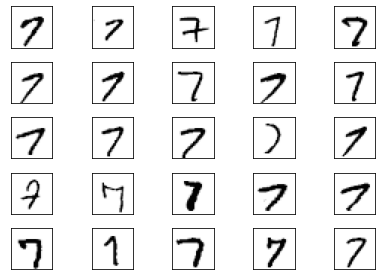

In [12]:
# 손글씨마다 얼마나 차이나는지 확인하기 위해 같은 샘플을 여러 개 출력
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

이전 단꼐를 모두 진행한 후 스케일된 이미지를 새로운 파이썬 세션에서 빠르게 읽을 수 있는 포맷으로 저장하는 것이 좋다. 이렇게 하면 데이터를 읽고 전처리하는 오버헤드를 피할 수 있다. 넘파이 배열을 사용할 때 다차원 배열을 디스크에 저장하는 효율적으로 가장 간편한 방법은 넘파이 savez 함수이다.

savez 함수는 pickle 모듈과 비슷하지만, 넘파이 배열을 저장하는 데 최적화되어 있다. savez 함수는 데이터를 압축하여 .npy 포맷 파일을 담고 있는 .npz 파일을 만든다. 

In [13]:
np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)

mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [14]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)

### 12.2.2 다층 퍼셉트론 구현



In [15]:
class NeuralNetMLP(object):
    """
    피드포워드 신경망 / 다층 퍼셉트론 분류기

    * 매개변수
        - n_hidden: int, defualt=30, 은닉 유닛 개수
        - l2: float, defualt=0., l2 규제의 람다값, l2=0이면 규제 없음.(기본값)
        - epochs: int, defualt=100, 훈련 세트를 반복할 횟수
        - eta: float, defualt=0.001, 학습률
        - shuffle: bool, defualt=True, 에포크마다 훈련 세트를 섞을지 여부. True이면 데이터를 섞어 순서를 바꾼다.
        - minibatch_size: int, defualt=1, 미니 배치의 훈련 샘플 개수
        - seed: int, defualt=None, 가중치와 데이터 셔플링을 위한 난수 초깃값

    * 속성
        - eval_: dict, 훈련 에포크마다 비용, 훈련 정확도, 검증 정확도를 수집하기 위한 딕셔너리
    """
    def __init__(self, n_hidden=30, l2=0, epochs=100,
                 eta=0.001, shuffle=True, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
    
    def _onehot(self, y, n_classes):
        """
        레이블 원-핫 인코딩

        * 매개변수
            - y: 배열, 크기=[n_samples], 타깃 값.
            - n_classes: int, 클래스 개수
        
        * 반환값
            - onehot: 배열, 크기=(n_samples, n_labels)
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T
    
    def _sigmoid(self, z):
        # 로지스틱 함수(시그모이드) 계산
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def _forward(self, X):
        # 정방향 계산 수행

        # 단계 1: 은닉층의 최종 입력
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # 단계 2: 은닉층의 활성화 출력
        a_h = self._sigmoid(z_h)

        # 단계 3: 출력층의 최종 입력
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]
        z_out = np.dot(a_h, self.w_out) + self.b_out

        # 단계 4: 출력층의 활성화 출력
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out
    
    def _compute_cost(self, y_enc, output):
        """
        비용 함수 계산

        * 매개변수
            - y_enc: 배열, 크기=(n_samples, n_labels)
                원-핫 인코딩된 클래스 레이블
            - output: 배열, 크기=[n_samples, n_output_units]
                출력층의 활성화 출력 (정방향 계산)
        
        * 반환값
            - cost: float, 규제가 포함된 비용
        """
        L2_term = (self.l2 *
                   (np.sum(self.w_h ** 2.) + 
                    np.sum(self.w_out ** 2.)))
        
        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term

        """
        다른 데이터셋에서는 극단적인 (0 또는 1에 가까운) 활성화 값이 나올 수 있다.
        파이썬과 넘파이의 수치 연산이 불안정하기 때문에 "ZeroDivisionError"가 발생할 수 있다.
        즉, log(0)을 평가하는 경우이다.
        이 문제를 해결하기 위해 로그 함수에 전달되는 활성화 값에 작은 상수를 더한다.

        ex)
        term1 = -y_enc * (np.log(output + 1e-5))
        term2 = (1. - y_enc) * np.log(1. - output + 1e-5)
        """
        return cost

    def predict(self, X):
        """
        클래스 레이블 예측

        * 매개변수
            - X: 배열, 크기=[n_samples, n_features]
                원본 특성의 입력층
        
        * 반환값
            - y_pred: 배열, 크기=[n_samples]
                예측된 클래스 레이블
        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train, X_valid, y_valid):
        """
        훈련 데이터셋에서 가중치 학습

        * 매개변수
            - X_train: 배열, 크기=[n_samples, n_features]
                원본 특성의 입력층
            - y_train: 배열, 크기=[n_samples]
                타깃 클래스 레이블
            - X_valid: 배열, 크기=[n_samples, n_features]
                훈련하는 동안 검증에 사용할 샘플 특성
            - y_valid: 배열, 크기=[n_samples]
                훈련하는 동안 검증에 사용할 샘플 레이블
            
        * 반환값 self
        """
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]

        ##############################
        # 가중치 초기화
        ##############################

        # 입력층 -> 은닉층 사이의 가중치
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_features, self.n_hidden))
        
        # 은닉층 -> 출력층 사이의 가중치
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_hidden, n_output))
        
        epoch_strlen = len(str(self.epochs))  # 출력 포맷을 위해
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # 훈련 에포크를 반복한다
        for i in range(self.epochs):

            # 미니 배치로 반복
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # 정방향 계산
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##############################
                # 역전파
                ##############################

                # [n_examples, n_classlabels]
                delta_out = a_out - y_train_enc[batch_idx]

                # [n_examples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_examples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_examples, n_hidden]
                delta_h = (np.dot(delta_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_examples] dot [n_examples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)
                grad_b_h = np.sum(delta_h, axis=0)

                # [n_hidden, n_examples] dot [n_examples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)

                # 규제와 가중치 업데이트
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # 편향은 규제하지 않는다.
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out # 편향은 규제 하지 않는다.
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out
            
            ##############################
            # 평가
            ##############################

            # 훈련하는 동안 에포크마다 평가
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | 비용: %.2f '
                             '| 훈련/검증 정확도: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost,
                              train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
        
        return self

In [16]:
nn = NeuralNetMLP(n_hidden=100,
                  l2=0.01,
                  epochs=200,
                  eta=0.0005,
                  minibatch_size=100,
                  shuffle=True,
                  seed=1)

In [17]:
nn.fit(X_train=X_train[:55000],
       y_train=y_train[:55000],
       X_valid=X_train[55000:],
       y_valid=y_train[55000:])

200/200 | 비용: 5065.78 | 훈련/검증 정확도: 99.28%/97.98% 

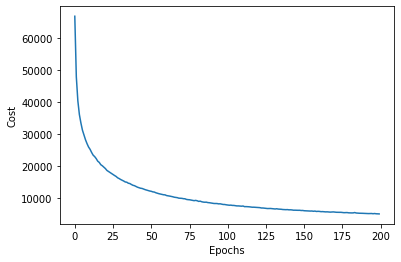

In [18]:
# eval_ 속성을 정의하여 에포크마다 비용, 훈련 정확도, 검증 정확도를 수집했다.
# 이를 맷플롯립을 사용하여 시각화.
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

비용은 100번의 에포크 동안 많이 감소한다. 그리고 이후 100번의 에포크에서 천천히 수렴하는 것으로 보인다. 하지만 175번째 200번째 에포크 사이에 약간 경사가 있어 에포크를 추가하여 훈련하면 비용이 더 감소할 것이다.

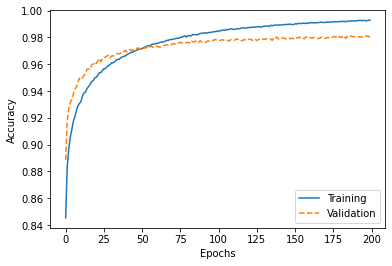

In [19]:
# 훈련 정확도와 검증 정확도 시각화
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='Training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='Validation', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

네트워크 훈련 에포크가 늘어날수록 훈련 정확도와 검증 정확도 사이 간격이 증가한다는 것을 보여준다. 약 50번째 에포크에서 훈련 정확도와 검증 정확도 값이 동일하고 그 이후에 네트워크는 훈련 데이터셋에 과대적합되기 시작한다.

* 과대적합 줄이는 방법
    * 규제 강도 높이기
    * 드롭아웃(dropout)

In [20]:
# 테스트 데이터셋에서 예측 정확도를 계산하여 모델 일반화 성능 평가
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float64) / X_test.shape[0])
print('테스트 정확도: %.2f%%' % (acc * 100))

테스트 정확도: 97.54%


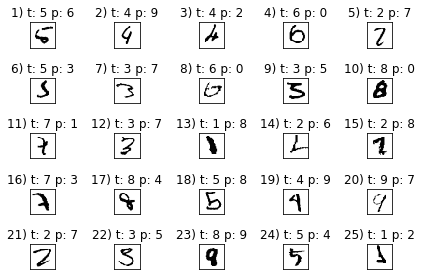

In [21]:
# 예측이 틀린 샘플들 확인
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5,            # 5 * 5 격자 그래프
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys',
                 interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i])) # 그래프 번호, 클래스 레이블, 예측된 클래스 레이블

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()